We are trying to identify what can be done about missing data. 
Now we will look at rows with too many missing fields.
We start with counting the missing fields per row.

In [2]:
import pandas as pd

# Load the cleaned data
file_path = '../../data/raw/immoweb_data.csv'
df = pd.read_csv(file_path)

# Count missing (NaN) values per row
df['missing_count'] = df.isna().sum(axis=1)

# Display first few rows with missing count
print(df[['id', 'missing_count']].head(10))

# Optionally show summary statistics
print("\nSummary of missing values per row:")
print(df['missing_count'].describe())

# If you want to see how many rows have more than, e.g., 10 missing fields:
num_sparse_rows = (df['missing_count'] > 10).sum()
print(f"\nRows with more than 10 missing fields: {num_sparse_rows}")


         id  missing_count
0  34221000              1
1   2104000              3
2  34036000              5
3  58496000              2
4  48727000              4
5  22183000              5
6  13232000              5
7  48707000              3
8  74290000              5
9  58028000              2

Summary of missing values per row:
count    75511.000000
mean         2.905762
std          1.647926
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: missing_count, dtype: float64

Rows with more than 10 missing fields: 0


Find the rows with the highest number of missing fields.
List exactly which columns are missing in those rows.

In [3]:
import pandas as pd

# Load cleaned data
file_path = '../../data/raw/immoweb_data.csv'
df = pd.read_csv(file_path)

# Count missing (NaN) values per row
df['missing_count'] = df.isna().sum(axis=1)

# Show basic stats
print("Summary of missing values per row:")
print(df['missing_count'].describe())

# Find the maximum number of missing fields
max_missing = df['missing_count'].max()
print(f"\nHighest number of missing fields in a row: {max_missing}")

# Get all rows that have this maximum number
most_missing_rows = df[df['missing_count'] == max_missing]

print(f"\nNumber of rows with {max_missing} missing fields: {len(most_missing_rows)}")

# Show which columns are missing for these rows
for idx, row in most_missing_rows.iterrows():
    missing_cols = row[row.isna()].index.tolist()
    print(f"\nRow index {idx}, ID: {row.get('id', 'N/A')}")
    print("Missing columns:", missing_cols)

# Optionally, display first few for inspection
display(most_missing_rows.head())

df[df["id"] == 16170000]


Summary of missing values per row:
count    75511.000000
mean         2.905762
std          1.647926
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: missing_count, dtype: float64

Highest number of missing fields in a row: 9

Number of rows with 9 missing fields: 2

Row index 22839, ID: 41635000
Missing columns: ['latitude', 'longitude', 'construction_year', 'total_area_sqm', 'surface_land_sqm', 'nbr_frontages', 'terrace_sqm', 'primary_energy_consumption_sqm', 'cadastral_income']

Row index 70525, ID: 8671000
Missing columns: ['latitude', 'longitude', 'construction_year', 'total_area_sqm', 'surface_land_sqm', 'nbr_frontages', 'terrace_sqm', 'garden_sqm', 'cadastral_income']


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
22839,41635000,129000.0,APARTMENT,FLAT_STUDIO,Flanders,West Flanders,Brugge,8370,NaN,NaN,...,0.0,0,0,JUST_RENOVATED,NaN,A+,ELECTRIC,1,NaN,9
70525,8671000,199900.0,APARTMENT,APARTMENT,Flanders,East Flanders,Oudenaarde,9600,NaN,NaN,...,NaN,0,0,MISSING,83.0,A,GAS,1,NaN,9


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
11791,16170000,599000.0,APARTMENT,APARTMENT,Wallonia,Walloon Brabant,Nivelles,1420,50.674914,4.393347,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN,5
52165,16170000,216500.0,APARTMENT,FLAT_STUDIO,MISSING,MISSING,MISSING,8539,NaN,NaN,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN,7


In [4]:
import pandas as pd

# Load cleaned data
file_path = '../../data/raw/immoweb_data.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Get unique missing counts sorted descending, top 5
top_counts = df['missing_count'].sort_values(ascending=False).unique()[:5]
print("Top 5 missing counts:", top_counts, "\n")

# Function to display rows and commonly missing columns
def display_missing_info(df, missing_count):
    rows = df[df['missing_count'] == missing_count]
    print(f"Rows with {missing_count} missing fields: {len(rows)}\n")
    
    # Compute commonly missing columns across these rows
    missing_cols = rows.isna().sum().sort_values(ascending=False)
    commonly_missing = missing_cols[missing_cols > 0]
    
    print("Most commonly missing columns in these rows:")
    display(commonly_missing)
    
    # Display the actual rows for inspection
    display(rows)

# Loop over top_counts and display info
for count in top_counts:
    display_missing_info(df, count)


Top 5 missing counts: [9 8 7 6 5] 

Rows with 9 missing fields: 2

Most commonly missing columns in these rows:


construction_year                 2
surface_land_sqm                  2
nbr_frontages                     2
total_area_sqm                    2
latitude                          2
longitude                         2
terrace_sqm                       2
cadastral_income                  2
primary_energy_consumption_sqm    1
garden_sqm                        1
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
22839,41635000,129000.0,APARTMENT,FLAT_STUDIO,Flanders,West Flanders,Brugge,8370,NaN,NaN,...,0.0,0,0,JUST_RENOVATED,NaN,A+,ELECTRIC,1,NaN,9
70525,8671000,199900.0,APARTMENT,APARTMENT,Flanders,East Flanders,Oudenaarde,9600,NaN,NaN,...,NaN,0,0,MISSING,83.0,A,GAS,1,NaN,9


Rows with 8 missing fields: 56

Most commonly missing columns in these rows:


construction_year                 56
longitude                         56
latitude                          56
cadastral_income                  56
surface_land_sqm                  55
nbr_frontages                     55
primary_energy_consumption_sqm    51
terrace_sqm                       33
total_area_sqm                    28
garden_sqm                         2
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
132,4073000,326652.0,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3500,NaN,NaN,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN,8
865,65561000,367288.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1140,NaN,NaN,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN,8
2773,4623000,269000.0,APARTMENT,APARTMENT,Flanders,East Flanders,Sint-Niklaas,9160,NaN,NaN,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN,8
3193,71379000,283000.0,APARTMENT,APARTMENT,Flanders,East Flanders,Sint-Niklaas,9160,NaN,NaN,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN,8
4506,23143000,659000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1140,NaN,NaN,...,0.0,0,1,AS_NEW,NaN,MISSING,MISSING,0,NaN,8
6352,34649000,369000.0,APARTMENT,APARTMENT,Flanders,West Flanders,Brugge,8370,NaN,NaN,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,1,NaN,8
7546,72769000,370000.0,APARTMENT,PENTHOUSE,Flanders,Flemish Brabant,Leuven,3150,NaN,NaN,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN,8
7941,67054000,396500.0,APARTMENT,APARTMENT,Flanders,West Flanders,Brugge,8370,NaN,NaN,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,1,NaN,8
9096,57470000,340000.0,APARTMENT,SERVICE_FLAT,Flanders,Flemish Brabant,Halle-Vilvoorde,1800,NaN,NaN,...,0.0,0,1,AS_NEW,NaN,MISSING,MISSING,0,NaN,8
14829,62040000,184000.0,APARTMENT,FLAT_STUDIO,Flanders,Flemish Brabant,Leuven,3001,NaN,NaN,...,0.0,0,1,MISSING,NaN,A,MISSING,0,NaN,8


Rows with 7 missing fields: 865

Most commonly missing columns in these rows:


cadastral_income                  859
longitude                         836
latitude                          836
construction_year                 821
surface_land_sqm                  810
nbr_frontages                     785
primary_energy_consumption_sqm    677
terrace_sqm                       247
total_area_sqm                    157
garden_sqm                         27
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
54,37326000,660000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1050,NaN,NaN,...,0.0,0,1,AS_NEW,NaN,MISSING,MISSING,0,NaN,7
55,69864000,199000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1190,NaN,NaN,...,0.0,0,1,GOOD,794.0,G,GAS,1,NaN,7
70,30123000,356600.0,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3520,NaN,NaN,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN,7
124,22619000,315871.0,APARTMENT,APARTMENT,Wallonia,Liège,Liège,4000,NaN,NaN,...,0.0,0,0,MISSING,NaN,MISSING,GAS,0,NaN,7
139,30963000,349500.0,APARTMENT,PENTHOUSE,Flanders,Antwerp,Mechelen,2500,51.133194,4.552156,...,0.0,0,1,AS_NEW,NaN,MISSING,MISSING,1,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75225,15448000,270000.0,APARTMENT,APARTMENT,Wallonia,Hainaut,Mons,7000,NaN,NaN,...,0.0,0,1,MISSING,43.0,A+,MISSING,0,NaN,7
75348,74555000,288000.0,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Halle-Vilvoorde,1830,NaN,NaN,...,0.0,0,1,AS_NEW,NaN,MISSING,MISSING,0,NaN,7
75380,76328000,699000.0,APARTMENT,PENTHOUSE,Flanders,Antwerp,Antwerp,2000,NaN,NaN,...,0.0,0,0,AS_NEW,NaN,MISSING,GAS,1,NaN,7
75428,63299000,370455.0,APARTMENT,APARTMENT,Wallonia,Namur,Namur,5030,NaN,NaN,...,0.0,0,1,MISSING,90.0,B,MISSING,0,NaN,7


Rows with 6 missing fields: 3769

Most commonly missing columns in these rows:


cadastral_income                  3684
construction_year                 3146
primary_energy_consumption_sqm    3090
latitude                          3051
longitude                         3051
nbr_frontages                     2686
surface_land_sqm                  2264
total_area_sqm                     783
terrace_sqm                        705
garden_sqm                         154
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
17,58409000,499000.0,HOUSE,HOUSE,Wallonia,Liège,Liège,4040,NaN,NaN,...,0.0,0,1,GOOD,200.0,C,MISSING,0,NaN,6
23,37990000,272000.0,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Halle-Vilvoorde,1500,NaN,NaN,...,0.0,0,1,AS_NEW,NaN,MISSING,MISSING,0,NaN,6
45,6574000,795000.0,APARTMENT,APARTMENT,Flanders,West Flanders,Kortrijk,8500,NaN,NaN,...,0.0,0,0,MISSING,167.0,B,MISSING,0,NaN,6
113,77288000,455000.0,HOUSE,HOUSE,Flanders,Flemish Brabant,Halle-Vilvoorde,1702,NaN,NaN,...,50.0,0,0,JUST_RENOVATED,NaN,C,GAS,1,NaN,6
125,48452000,725976.0,HOUSE,HOUSE,Wallonia,Hainaut,Mouscron,7784,NaN,NaN,...,0.0,0,1,GOOD,NaN,MISSING,GAS,1,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75366,9297000,140000.0,APARTMENT,APARTMENT,Flanders,West Flanders,Kortrijk,8500,50.829289,3.263338,...,0.0,0,0,GOOD,NaN,MISSING,MISSING,0,NaN,6
75376,7854000,189000.0,APARTMENT,APARTMENT,Wallonia,Hainaut,Charleroi,6240,NaN,NaN,...,0.0,0,1,MISSING,298.0,D,MISSING,1,NaN,6
75401,17636000,212000.0,APARTMENT,APARTMENT,Wallonia,Hainaut,Charleroi,7181,NaN,NaN,...,0.0,0,1,AS_NEW,NaN,MISSING,GAS,1,NaN,6
75441,50372000,275000.0,APARTMENT,APARTMENT,Flanders,West Flanders,Brugge,8370,NaN,NaN,...,0.0,0,1,GOOD,NaN,MISSING,MISSING,1,NaN,6


Rows with 5 missing fields: 8982

Most commonly missing columns in these rows:


cadastral_income                  8417
construction_year                 7244
surface_land_sqm                  7064
primary_energy_consumption_sqm    6777
nbr_frontages                     6211
latitude                          3166
longitude                         3166
terrace_sqm                       1375
total_area_sqm                    1243
garden_sqm                         247
dtype: int64

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN,5
5,22183000,548514.0,HOUSE,HOUSE,Flanders,Flemish Brabant,Halle-Vilvoorde,1700,NaN,NaN,...,0.0,0,1,AS_NEW,NaN,MISSING,MISSING,0,NaN,5
6,13232000,325000.0,APARTMENT,APARTMENT,Wallonia,Walloon Brabant,Nivelles,1420,50.683607,4.371513,...,0.0,0,1,MISSING,NaN,MISSING,GAS,1,NaN,5
8,74290000,185000.0,APARTMENT,APARTMENT,Wallonia,Liège,Liège,4000,50.631825,5.557352,...,0.0,0,1,MISSING,212.0,C,MISSING,1,NaN,5
11,52406000,957000.0,APARTMENT,APARTMENT,Flanders,West Flanders,Veurne,8670,51.133551,2.684137,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75492,28581000,538008.0,HOUSE,HOUSE,Flanders,East Flanders,Oudenaarde,9600,NaN,NaN,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN,5
75494,5493000,193000.0,APARTMENT,APARTMENT,Wallonia,Hainaut,Ath,7973,50.508440,3.717584,...,0.0,0,1,GOOD,NaN,MISSING,MISSING,0,NaN,5
75498,61806000,265000.0,APARTMENT,APARTMENT,Flanders,West Flanders,Oostend,8400,51.222082,2.908213,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,1,NaN,5
75502,9656000,339000.0,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Leuven,3200,50.987442,4.826695,...,0.0,0,1,AS_NEW,NaN,MISSING,MISSING,1,NaN,5


Combined for >= 5 missing rows

In [5]:
import pandas as pd

# Load cleaned data
file_path = '../../data/raw/immoweb_data.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Filter rows with missing_count >= 5
df_sparse = df[df['missing_count'] >= 5]
print(f"Number of rows with missing_count >= 5: {len(df_sparse)}\n")

# Count missing values per column across all these rows
missing_cols_overall = df_sparse.isna().sum()
missing_cols_overall = missing_cols_overall[missing_cols_overall > 0].sort_values(ascending=False)

# Display the combined info
print("Columns missing across all rows with missing_count >= 5 (column: # missing):")
display(missing_cols_overall)


Number of rows with missing_count >= 5: 13674

Columns missing across all rows with missing_count >= 5 (column: # missing):


cadastral_income                  13018
construction_year                 11269
primary_energy_consumption_sqm    10596
surface_land_sqm                  10195
nbr_frontages                      9739
latitude                           7111
longitude                          7111
terrace_sqm                        2362
total_area_sqm                     2213
garden_sqm                          431
dtype: int64

In [5]:
import pandas as pd

# Load cleaned data
file_path = '../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Count missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Filter rows with missing_count >= 4
df_sparse = df[df['missing_count'] >= 4]
print(f"Number of rows with missing_count >= 4: {len(df_sparse)}\n")

# Count missing values per column across all these rows
missing_cols_overall = df_sparse.isna().sum()
missing_cols_overall = missing_cols_overall[missing_cols_overall > 0].sort_values(ascending=False)

# Display the combined info
print("Columns missing across all rows with missing_count >= 4 (column: # missing):")
display(missing_cols_overall)

Number of rows with missing_count >= 4: 32918

Columns missing across all rows with missing_count >= 4 (column: # missing):


cadastral_income                  29816
primary_energy_consumption_sqm    22739
surface_land_sqm                  22121
epc                               21660
construction_year                 20224
nbr_frontages                     17988
latitude                          10451
longitude                         10451
terrace_sqm                        5394
total_area_sqm                     4585
garden_sqm                         1274
locality                              3
region                                3
province                              3
dtype: int64

- How many observations and features/columns do you have?
  75511 observations & 30 columns 

In [6]:
# calculate numnber of observations and features/columns

import pandas as pd

# Load the raw data file
file_path = '../data/raw/immoweb_data.csv'  # update path if needed

# --- 1. Auto-detect separator ---
with open(file_path, 'r', encoding='utf-8') as f:
    first_line = f.readline()
    sep = ';' if ';' in first_line else ','
# print("Detected separator:", repr(sep))

# --- 2. Load CSV using detected separator ---
df_raw = pd.read_csv(file_path, sep=sep, dtype={"id": str}, low_memory=False)

# --- 3. Overview ---
num_rows, num_cols = df_raw.shape
print(f"Number of observations (rows): {num_rows}")
print(f"Number of features (columns): {num_cols}\n")

# print("Columns in the raw dataset:")
# print(df_raw.columns.tolist())

# print("\nPreview of raw data:")
# display(df_raw.head())

Number of observations (rows): 75511
Number of features (columns): 30



- What is the proportion of missing values per column?

In [6]:
# Added code for proportion of missing values per column

import pandas as pd

# Load the raw data file
file_path = '../../data/raw/immoweb_data.csv'  # update path if needed

# --- 1. Auto-detect separator ---
with open(file_path, 'r', encoding='utf-8') as f:
    first_line = f.readline()
    sep = ';' if ';' in first_line else ','

# --- 2. Load CSV using detected separator ---
df_raw = pd.read_csv(file_path, sep=sep, dtype={"id": str}, low_memory=False)

# --- 3. Overview of dataset ---
num_rows, num_cols = df_raw.shape
print(f"Number of observations (rows): {num_rows}")
print(f"Number of features (columns): {num_cols}\n")

# --- 4. Proportion of missing values per column ---
missing_percent = df_raw.isna().mean() * 100
print("Proportion of missing values per column (%):")
display(missing_percent.sort_values(ascending=False))

Number of observations (rows): 75511
Number of features (columns): 30

Proportion of missing values per column (%):


cadastral_income                  59.550264
surface_land_sqm                  48.014197
construction_year                 44.220047
primary_energy_consumption_sqm    35.182953
nbr_frontages                     34.890281
longitude                         18.670128
latitude                          18.670128
terrace_sqm                       17.401438
total_area_sqm                    10.084623
garden_sqm                         3.892148
province                           0.000000
region                             0.000000
subproperty_type                   0.000000
property_type                      0.000000
zip_code                           0.000000
locality                           0.000000
id                                 0.000000
price                              0.000000
fl_open_fire                       0.000000
fl_furnished                       0.000000
nbr_bedrooms                       0.000000
equipped_kitchen                   0.000000
fl_garden                       

Proportion of missing values per column (%):
cadastral_income                  59.550264
surface_land_sqm                  48.014197
construction_year                 44.220047
primary_energy_consumption_sqm    35.182953
nbr_frontages                     34.890281
longitude                         18.670128
latitude                          18.670128
terrace_sqm                       17.401438
total_area_sqm                    10.084623
garden_sqm                         3.892148
province                           0.000000
region                             0.000000
subproperty_type                   0.000000
property_type                      0.000000
zip_code                           0.000000
locality                           0.000000
id                                 0.000000
price                              0.000000
fl_open_fire                       0.000000
fl_furnished                       0.000000
nbr_bedrooms                       0.000000
equipped_kitchen                   0.000000
fl_garden                          0.000000
fl_terrace                         0.000000
fl_floodzone                       0.000000
fl_swimming_pool                   0.000000
state_building                     0.000000
epc                                0.000000
heating_type                       0.000000
fl_double_glazing                  0.000000

- Which variables would you delete and why?

In [8]:
# threshold for dropping columns
threshold = 30  # percentage

# columns with more than threshold % missing values
columns_to_drop = missing_percent[missing_percent > threshold].sort_values(ascending=False)
print("Columns with >30% missing values:")
display(columns_to_drop)

# Suggested columns to keep
columns_to_keep = missing_percent[missing_percent <= threshold].sort_values(ascending=False)
print("\nColumns with <=30% missing values (recommended to keep):")
display(columns_to_keep)

Columns with >30% missing values:


cadastral_income                  59.550264
surface_land_sqm                  48.014197
construction_year                 44.220047
primary_energy_consumption_sqm    35.182953
nbr_frontages                     34.890281
dtype: float64


Columns with <=30% missing values (recommended to keep):


latitude             18.670128
longitude            18.670128
terrace_sqm          17.401438
total_area_sqm       10.084623
garden_sqm            3.892148
id                    0.000000
price                 0.000000
subproperty_type      0.000000
property_type         0.000000
zip_code              0.000000
locality              0.000000
province              0.000000
region                0.000000
equipped_kitchen      0.000000
fl_furnished          0.000000
fl_open_fire          0.000000
nbr_bedrooms          0.000000
fl_terrace            0.000000
fl_garden             0.000000
fl_swimming_pool      0.000000
fl_floodzone          0.000000
state_building        0.000000
epc                   0.000000
heating_type          0.000000
fl_double_glazing     0.000000
dtype: float64

In [9]:
import pandas as pd

# Make sure property type is standardized
df['property_type'] = df['property_type'].str.lower().str.strip()

# Loop over each property type and calculate missing percentages
for ptype in df['property_type'].dropna().unique():
    print(f"\n--- Missing values for property type: {ptype.upper()} ---")
    subset = df[df['property_type'] == ptype]
    missing_pct = subset.isna().mean() * 100
    missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
    print(missing_pct.round(3))



--- Missing values for property type: APARTMENT ---
surface_land_sqm                  100.000
cadastral_income                   74.253
nbr_frontages                      50.636
primary_energy_consumption_sqm     44.071
construction_year                  41.296
epc                                40.888
latitude                           16.258
longitude                          16.258
terrace_sqm                        10.920
total_area_sqm                      6.353
garden_sqm                          1.432
locality                            0.006
region                              0.006
province                            0.006
dtype: float64

--- Missing values for property type: HOUSE ---
construction_year                 46.916
cadastral_income                  45.969
primary_energy_consumption_sqm    26.975
terrace_sqm                       23.388
epc                               23.383
longitude                         20.899
latitude                          20.899
nbr_fron

In [10]:
import pandas as pd

# Dimensions
print(df.shape)

# Data types
print(df.dtypes)

# Summary statistics (numeric)
display(df.describe().T)

# Quick look at categorical variables
display(df.describe(include='object').T)

# Missing values
display(df.isna().mean().sort_values(ascending=False).round(3))


(75508, 31)
id                                  int64
price                               int64
property_type                      object
subproperty_type                   object
region                             object
province                           object
locality                           object
zip_code                            int64
latitude                          float64
longitude                         float64
construction_year                 float64
total_area_sqm                    float64
surface_land_sqm                  float64
nbr_frontages                     float64
nbr_bedrooms                        int64
equipped_kitchen                   object
fl_furnished                        int64
fl_open_fire                        int64
fl_terrace                          int64
terrace_sqm                       float64
fl_garden                           int64
garden_sqm                        float64
fl_swimming_pool                    int64
fl_floodzone          

,count,mean,std,min,25%,50%,75%,max
id,75508.0,3.973205e+07,2.290449e+07,0.00000,1.989175e+07,3.972150e+07,5.954125e+07,7.948500e+07
price,75508.0,4.227730e+06,4.383664e+06,760000.00000,2.420000e+06,3.290000e+06,4.550000e+06,2.250000e+08
zip_code,75508.0,5.144670e+03,3.005457e+03,1000.00000,2.240000e+03,4.683000e+03,8.370000e+03,9.992000e+03
latitude,61410.0,5.088662e+01,3.497337e-01,25.76168,5.070581e+01,5.090093e+01,5.114864e+01,5.243424e+01
longitude,61410.0,4.328681e+00,9.509054e-01,-80.19179,3.764070e+00,4.376711e+00,4.876499e+00,6.385048e+00
construction_year,42120.0,1.984406e+03,4.152885e+01,1753.00000,1.962000e+03,1.994000e+03,2.022000e+03,2.024000e+03
total_area_sqm,67893.0,1.636743e+02,4.158599e+02,3.00000,9.100000e+01,1.270000e+02,1.850000e+02,8.814000e+04
surface_land_sqm,39255.0,1.157088e+03,1.011734e+04,0.00000,1.500000e+02,3.620000e+02,8.050000e+02,9.507740e+05
nbr_frontages,49162.0,2.802978e+00,8.891679e-01,1.00000,2.000000e+00,3.000000e+00,4.000000e+00,4.700000e+01
nbr_bedrooms,75508.0,2.787321e+00,1.894196e+00,0.00000,2.000000e+00,3.000000e+00,3.000000e+00,2.000000e+02


,count,unique,top,freq
property_type,75508,2,house,39255
subproperty_type,75508,23,HOUSE,29730
region,75505,3,Flanders,43423
province,75505,11,West Flanders,11797
locality,75505,43,Brussels,7956
equipped_kitchen,75508,9,MISSING,33022
state_building,75508,7,MISSING,26642
epc,51506,9,B,10481
heating_type,75508,8,GAS,31873


cadastral_income                  0.595
surface_land_sqm                  0.480
construction_year                 0.442
primary_energy_consumption_sqm    0.352
nbr_frontages                     0.349
epc                               0.318
latitude                          0.187
longitude                         0.187
terrace_sqm                       0.174
total_area_sqm                    0.101
garden_sqm                        0.039
region                            0.000
province                          0.000
locality                          0.000
price                             0.000
nbr_bedrooms                      0.000
zip_code                          0.000
id                                0.000
subproperty_type                  0.000
property_type                     0.000
fl_terrace                        0.000
equipped_kitchen                  0.000
fl_furnished                      0.000
fl_swimming_pool                  0.000
fl_garden                         0.000


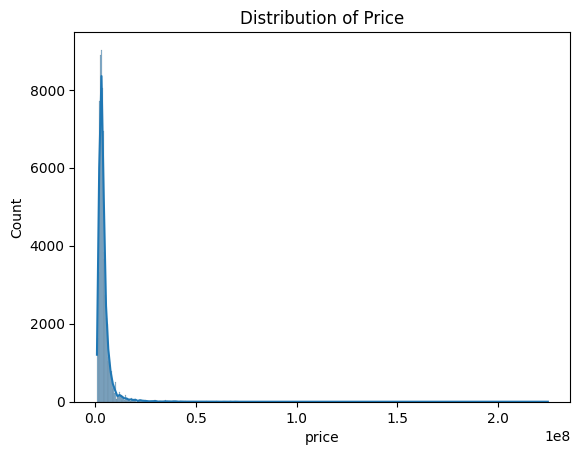

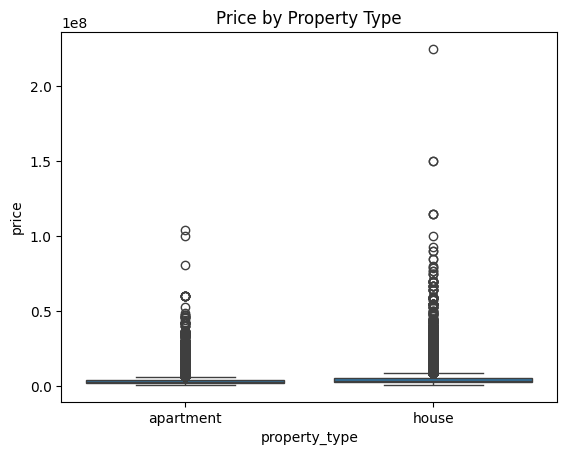

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric example
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

# Boxplot example
sns.boxplot(x='property_type', y='price', data=df)
plt.title('Price by Property Type')
plt.show()


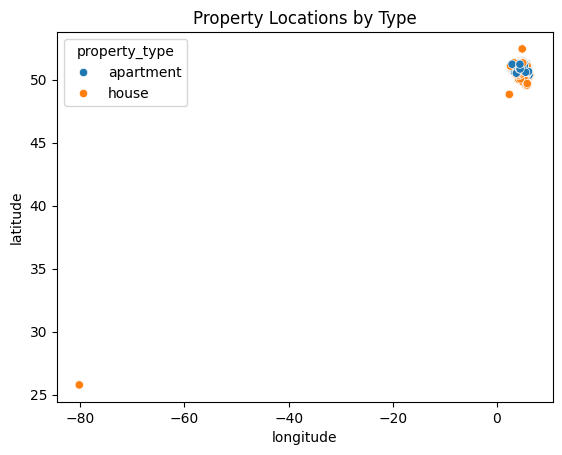

In [12]:
sns.scatterplot(x='longitude', y='latitude', hue='property_type', data=df)
plt.title('Property Locations by Type')
plt.show()


,id,price,zip_code,latitude,longitude,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,...,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,primary_energy_consumption_sqm,fl_double_glazing,cadastral_income,missing_count
id,1.00,0.00,-0.00,-0.01,-0.00,-0.00,0.00,-0.00,0.00,0.01,...,0.01,0.01,0.01,-0.01,-0.00,-0.01,-0.00,0.00,0.00,-0.00
price,0.00,1.00,-0.04,0.17,-0.09,-0.03,0.20,0.15,0.15,0.35,...,0.03,0.11,0.03,0.09,0.20,-0.06,-0.00,0.00,0.00,0.01
zip_code,-0.00,-0.04,1.00,0.01,-0.49,0.14,-0.01,-0.00,0.05,0.00,...,-0.13,-0.05,-0.08,-0.01,-0.02,-0.07,0.00,-0.04,0.00,0.06
latitude,-0.01,0.17,0.01,1.00,-0.14,0.06,-0.05,-0.02,-0.10,-0.08,...,-0.02,-0.03,-0.09,-0.04,-0.02,-0.25,0.01,-0.02,-0.01,0.08
longitude,-0.00,-0.09,-0.49,-0.14,1.00,-0.08,0.06,0.01,0.08,0.07,...,0.08,0.05,0.13,0.03,0.02,0.15,-0.01,0.07,0.00,-0.11
construction_year,-0.00,-0.03,0.14,0.06,-0.08,1.00,-0.21,-0.05,0.06,-0.19,...,0.16,0.02,-0.13,-0.07,-0.00,0.01,-0.00,0.03,-0.00,0.47
total_area_sqm,0.00,0.20,-0.01,-0.05,0.06,-0.21,1.00,0.08,0.07,0.22,...,-0.02,0.05,0.04,0.04,0.06,0.00,0.00,-0.00,0.00,-0.05
surface_land_sqm,-0.00,0.15,-0.00,-0.02,0.01,-0.05,0.08,1.00,0.09,0.07,...,-0.00,0.02,-0.00,0.19,0.05,0.01,-0.00,-0.00,0.00,0.00
nbr_frontages,0.00,0.15,0.05,-0.10,0.08,0.06,0.07,0.09,1.00,0.14,...,-0.00,0.07,0.09,0.10,0.16,0.02,0.01,-0.02,0.01,-0.04
nbr_bedrooms,0.01,0.35,0.00,-0.08,0.07,-0.19,0.22,0.07,0.14,1.00,...,-0.03,0.05,0.14,0.08,0.09,-0.01,0.00,0.02,0.00,-0.17


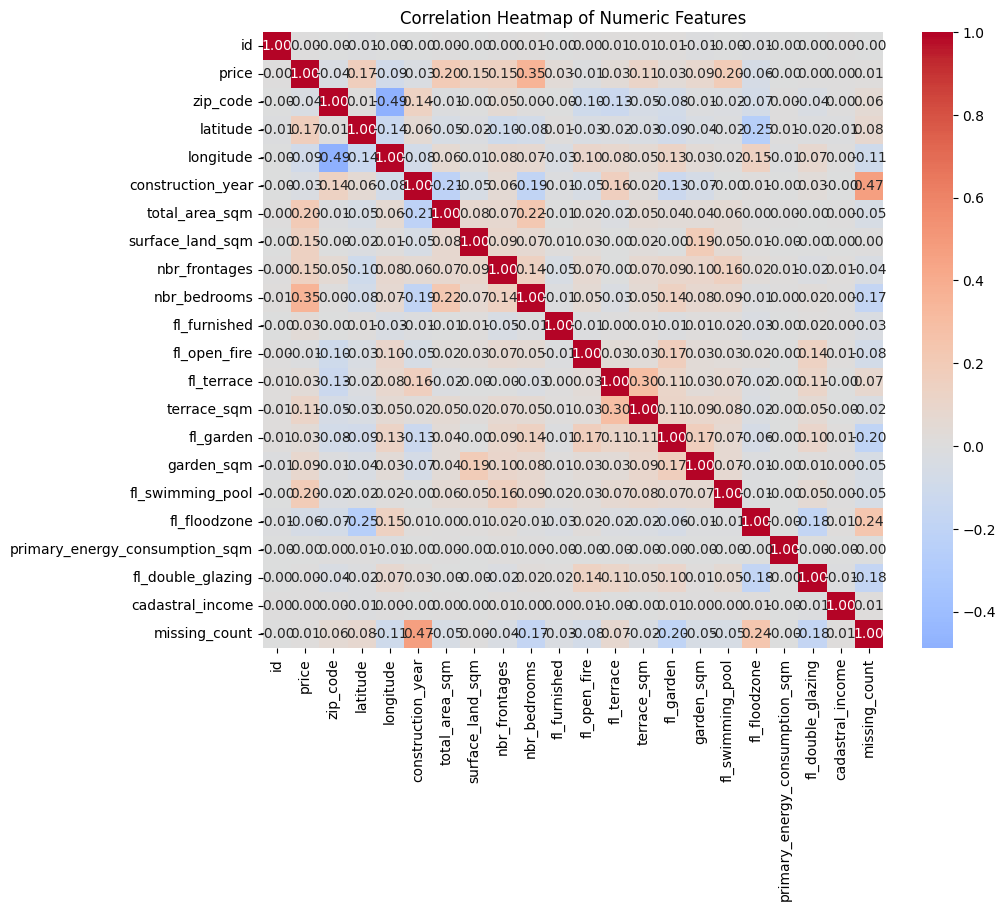

In [13]:
import pandas as pd

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Round for readability
corr_matrix_rounded = corr_matrix.round(2)

# Display as table
display(corr_matrix_rounded)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [15]:
import pandas as pd
import numpy as np

# Select numeric columns (excluding location columns)
numeric_cols = [col for col in df.select_dtypes(include='number').columns
                if col not in ['zip_code', 'latitude', 'longitude', 'missing_count']]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Flatten the matrix, keep only one triangle (no duplicates)
corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Sort by absolute correlation descending
corr_pairs['abs_corr'] = corr_pairs['Correlation'].abs()
corr_pairs_sorted = corr_pairs.sort_values('abs_corr', ascending=False).drop(columns='abs_corr')

# Display
display(corr_pairs_sorted)


,Feature 1,Feature 2,Correlation
21,price,nbr_bedrooms,0.352444
117,fl_terrace,terrace_sqm,0.296247
50,total_area_sqm,nbr_bedrooms,0.222688
33,construction_year,total_area_sqm,-0.214476
18,price,total_area_sqm,0.199648
...,...,...,...
12,id,fl_swimming_pool,-0.000368
140,garden_sqm,primary_energy_consumption_sqm,-0.000265
151,primary_energy_consumption_sqm,cadastral_income,-0.000241
74,surface_land_sqm,cadastral_income,0.000192


heating_type
GAS         31873
MISSING     31443
FUELOIL      7711
ELECTRIC     3621
PELLET        499
WOOD          147
SOLAR         134
CARBON         80
Name: count, dtype: int64

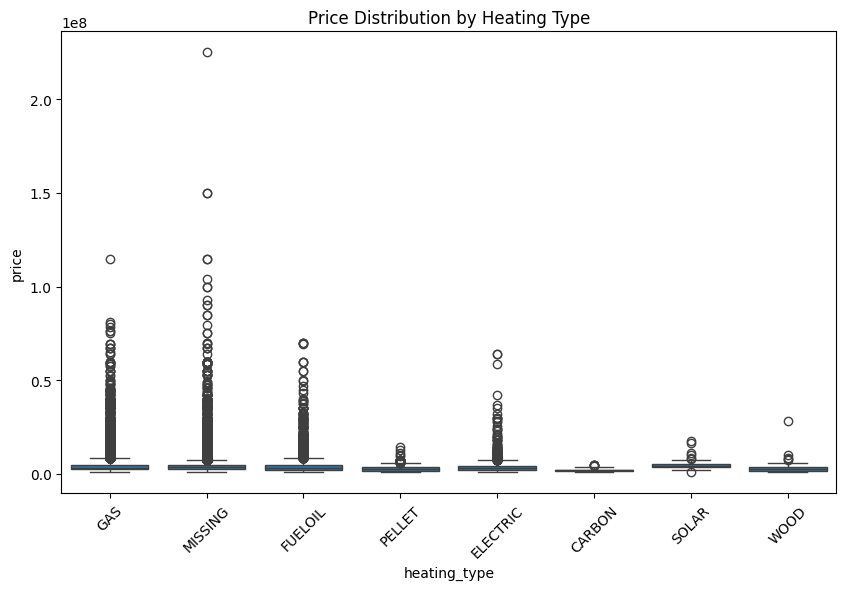

price                   total_area_sqm        nbr_bedrooms  \
                   mean     median  count           mean median         mean   
heating_type                                                                   
CARBON        1987937.4  1995000.0     80          148.4  127.0          2.4   
ELECTRIC      3559096.7  2940000.0   3621          124.8  101.0          2.4   
FUELOIL       4281676.1  3250000.0   7711          233.0  183.0          3.6   
GAS           4262487.1  3190000.0  31873          159.2  129.0          2.8   
MISSING       4290124.4  3431680.0  31443          155.8  117.0          2.6   
PELLET        2720002.5  2350000.0    499          164.4  141.0          2.9   
SOLAR         4762168.4  4370000.0    134          150.2  133.0          2.7   
WOOD          2835619.0  2450000.0    147          174.5  148.5          3.0   

                    primary_energy_consumption_sqm         
             median                           mean median  
heating_type                                               
CARBON          2.0                          740.1  744.0  
ELECTRIC        2.0                         8257.2  328.0  
FUELOIL         3.0                         1087.2  371.0  
GAS             3.0                         1183.6  223.0  
MISSING         2.0                         1708.4  171.0  
PELLET          3.0                          442.8  356.5  
SOLAR           3.0                           47.0   30.0  
WOOD            3.0                          601.5  541.0

In [16]:
# Count of each heating type
heating_counts = df['heating_type'].value_counts(dropna=False)
display(heating_counts)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='heating_type', y='price', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Heating Type')
plt.show()

summary_heating = df.groupby('heating_type').agg({
    'price': ['mean', 'median', 'count'],
    'total_area_sqm': ['mean', 'median'],
    'nbr_bedrooms': ['mean', 'median'],
    'primary_energy_consumption_sqm': ['mean', 'median']
}).round(1)

display(summary_heating)


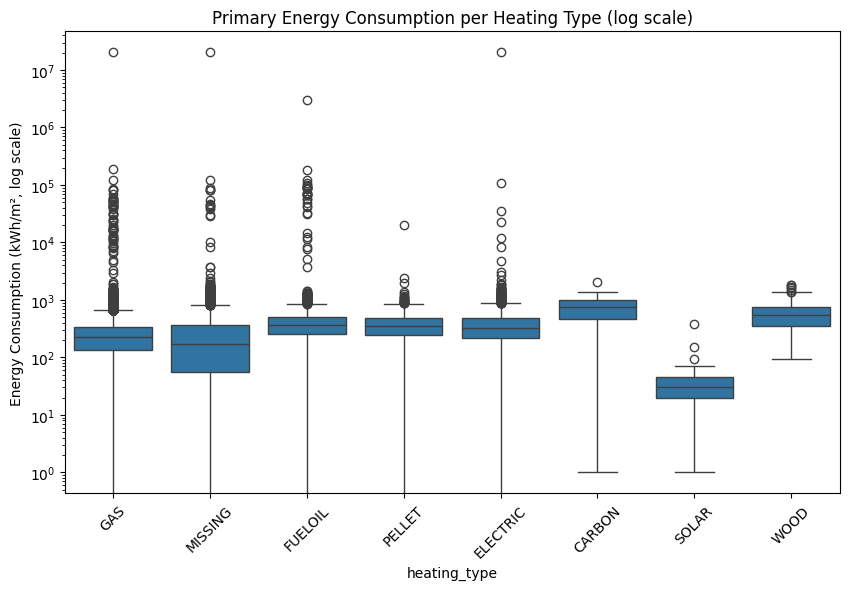

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='heating_type', y='primary_energy_consumption_sqm', data=df)
plt.yscale('log')  # use log scale to compress extreme values
plt.xticks(rotation=45)
plt.title('Primary Energy Consumption per Heating Type (log scale)')
plt.ylabel('Energy Consumption (kWh/m², log scale)')
plt.show()



FRI 14 Nov
EDA

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

df = pd.read_csv("../Kristin/cleaned_properties.csv")

# QUICK CHECKS
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75508 entries, 0 to 75507
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              75508 non-null  int64  
 1   price                           75508 non-null  int64  
 2   property_type                   75508 non-null  object 
 3   subproperty_type                75508 non-null  object 
 4   region                          75505 non-null  object 
 5   province                        75505 non-null  object 
 6   locality                        75505 non-null  object 
 7   zip_code                        75508 non-null  int64  
 8   latitude                        61410 non-null  float64
 9   longitude                       61410 non-null  float64
 10  construction_year               42120 non-null  float64
 11  total_area_sqm                  67893 non-null  float64
 12  surface_land_sqm                

id                                    0
price                                 0
property_type                         0
subproperty_type                      0
region                                3
province                              3
locality                              3
zip_code                              0
latitude                          14098
longitude                         14098
construction_year                 33388
total_area_sqm                     7615
surface_land_sqm                  36253
nbr_frontages                     26346
nbr_bedrooms                          0
equipped_kitchen                      0
fl_furnished                          0
fl_open_fire                          0
fl_terrace                            0
terrace_sqm                       13140
fl_garden                             0
garden_sqm                         2939
fl_swimming_pool                      0
fl_floodzone                          0
state_building                        0


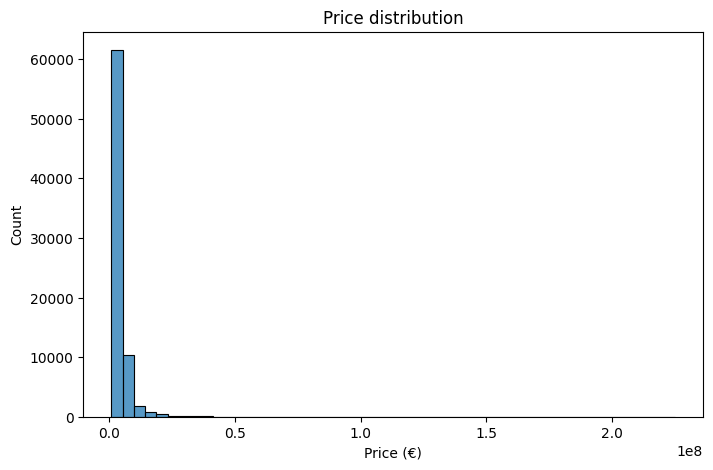

In [19]:
# PRICE DISTRIBUTION
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=50)
plt.xlabel("Price (€)")
plt.title("Price distribution")
plt.show()


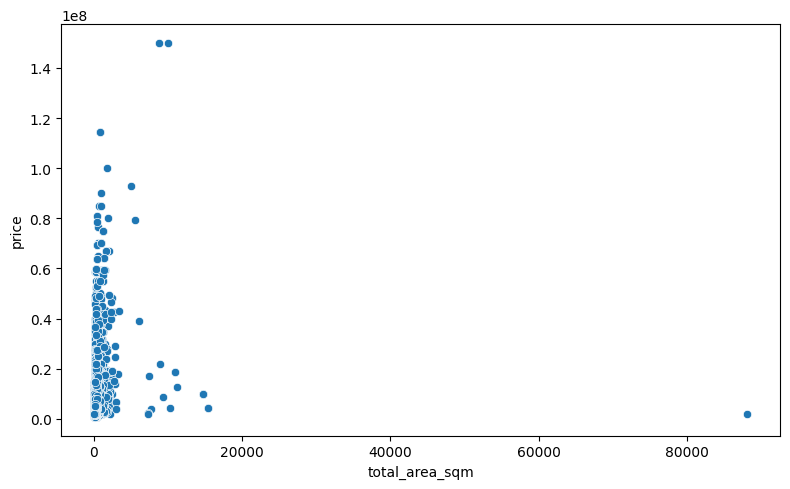

In [20]:
# PRICE VS LIVING AREA
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="total_area_sqm", y="price")
plt.tight_layout()
plt.show()


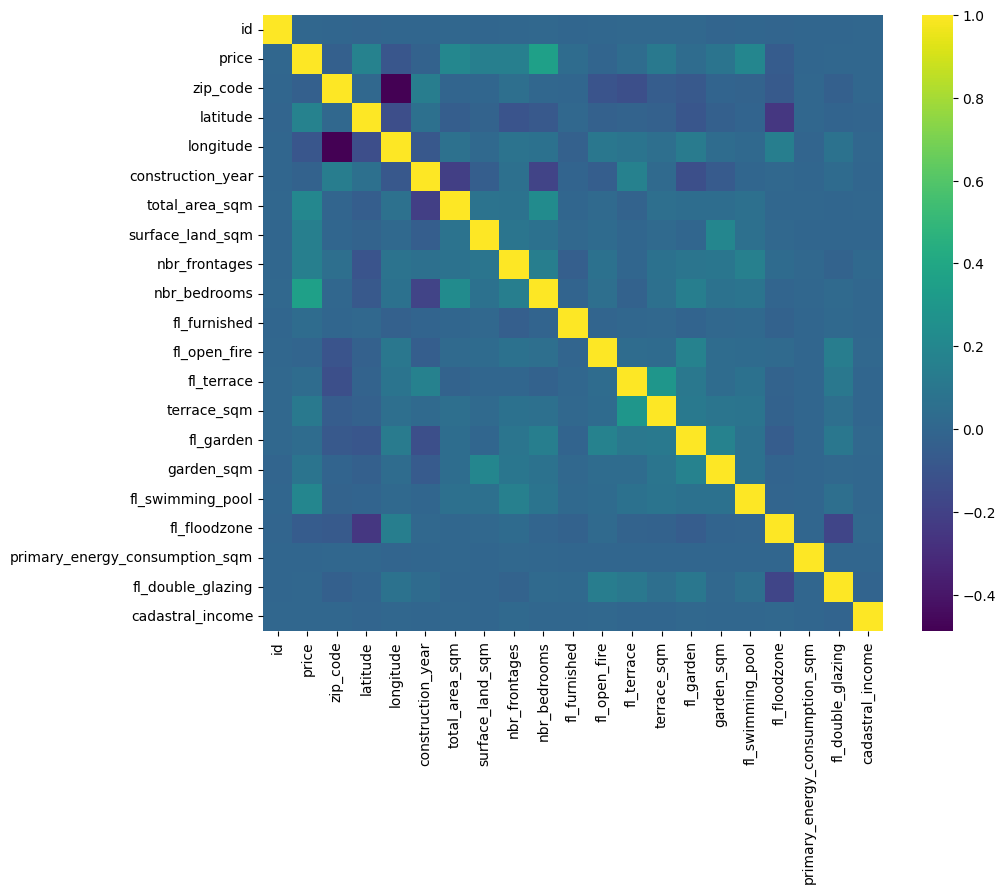

In [21]:
# CORRELATION HEATMAP
numeric = df.select_dtypes(include="number")

plt.figure(figsize=(10,8))
sns.heatmap(numeric.corr(), annot=False, cmap="viridis")
plt.show()  

In [22]:
# MAP
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"  # VS Code native renderer
pio.renderers.default = "notebook_connected"

fig = px.scatter_map(
    df,
    lat="latitude",
    lon="longitude",
    color="price",
    zoom=7,
)
fig.show()


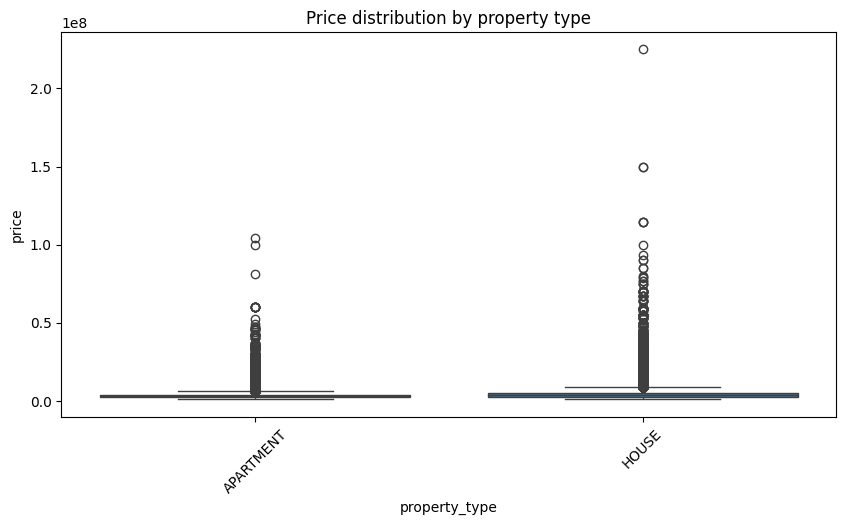

In [23]:
# PROPERTY TYPE & SUBTYPE VS PRICE
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="property_type", y="price")
plt.xticks(rotation=45)
plt.title("Price distribution by property type")
plt.show()

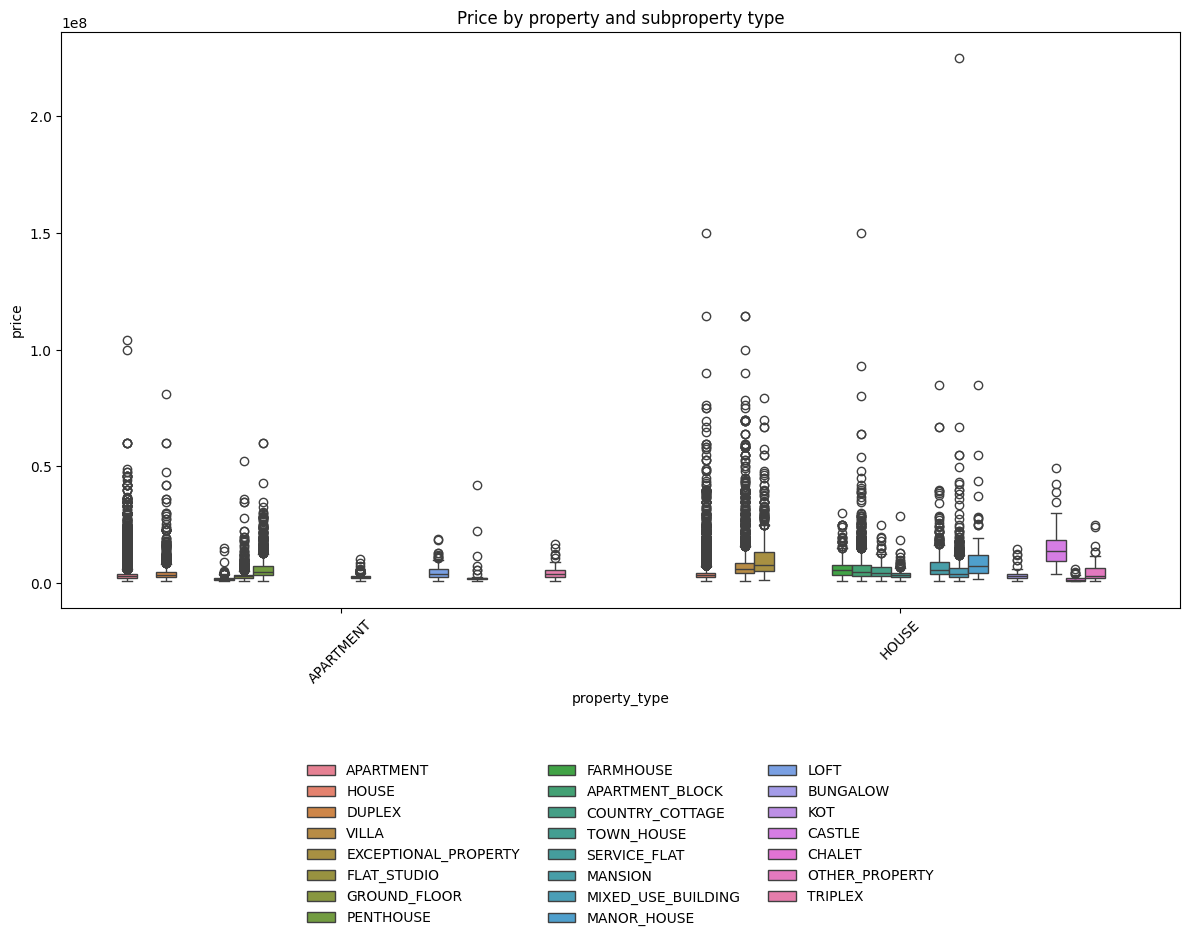

In [24]:
# PER SUBPROPERTY TYPE
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x="property_type", y="price", hue="subproperty_type")
plt.xticks(rotation=45)
plt.title("Price by property and subproperty type")

# Move legend to bottom and wrap to multiple rows
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=3,  # pick number of columns per row
    frameon=False
)

plt.tight_layout()
plt.show()


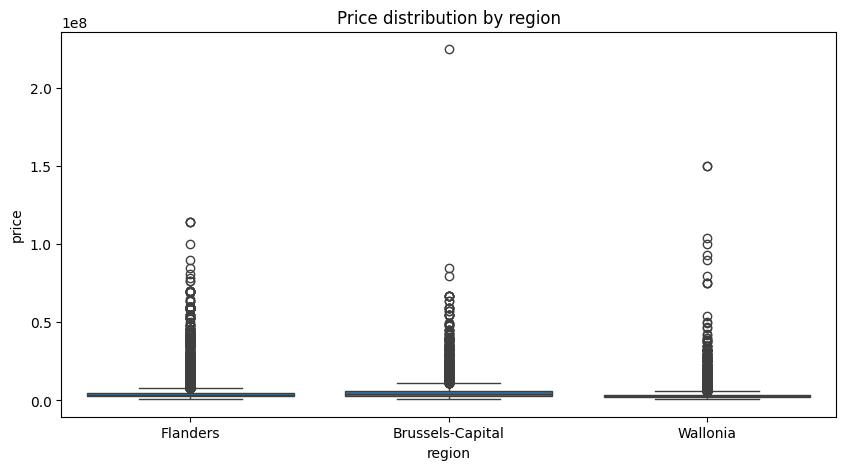

In [25]:
# REGIONAL PRICE DIFFERENCES
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="region", y="price")
plt.title("Price distribution by region")
plt.show()

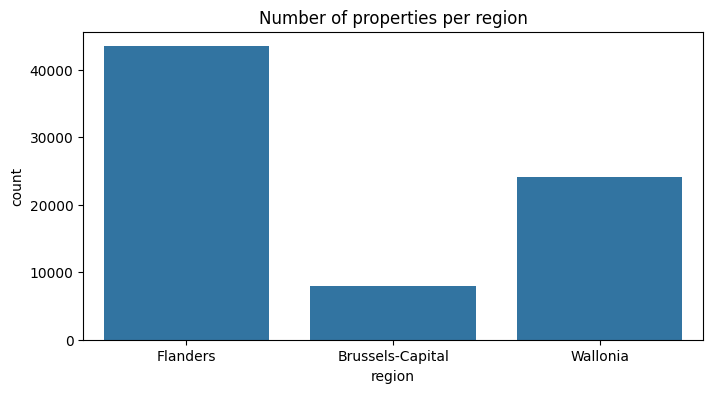

In [26]:
# PROPERTIES PER REGION
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="region")
plt.title("Number of properties per region")
plt.show()

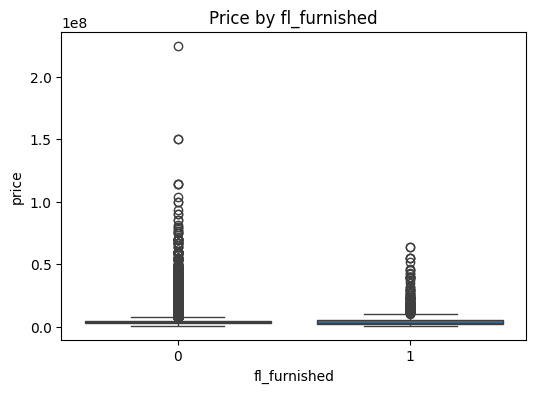

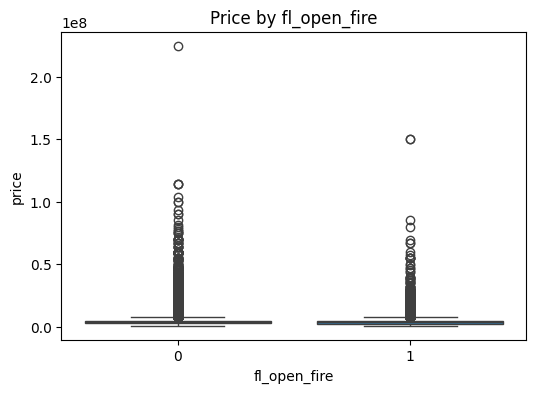

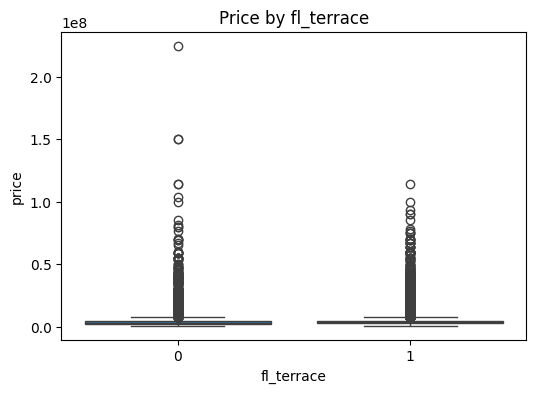

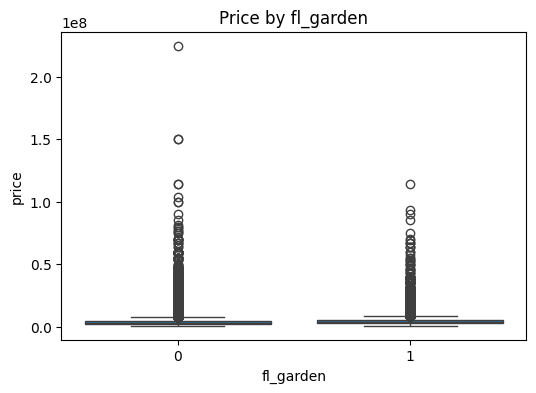

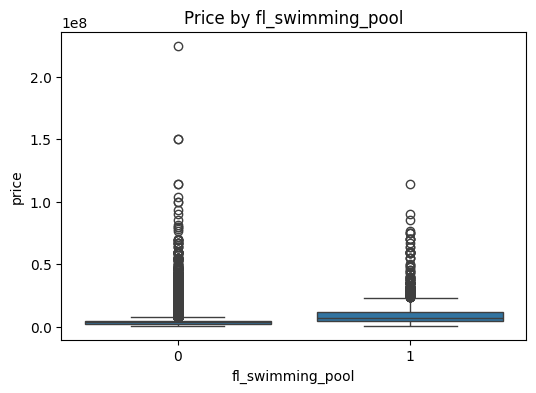

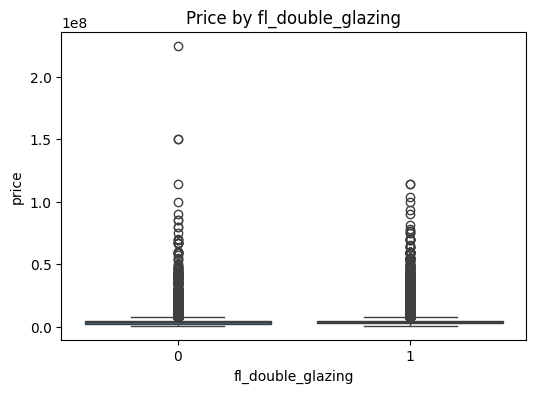

In [27]:
# FEATURES VS PRICE
features = ["fl_furnished", "fl_open_fire", "fl_terrace", "fl_garden", "fl_swimming_pool", "fl_double_glazing"]

for f in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=f, y="price")
    plt.title(f"Price by {f}")
    plt.show()


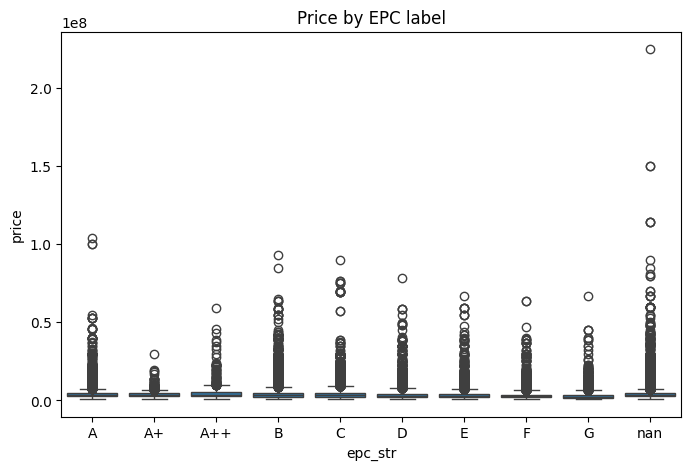

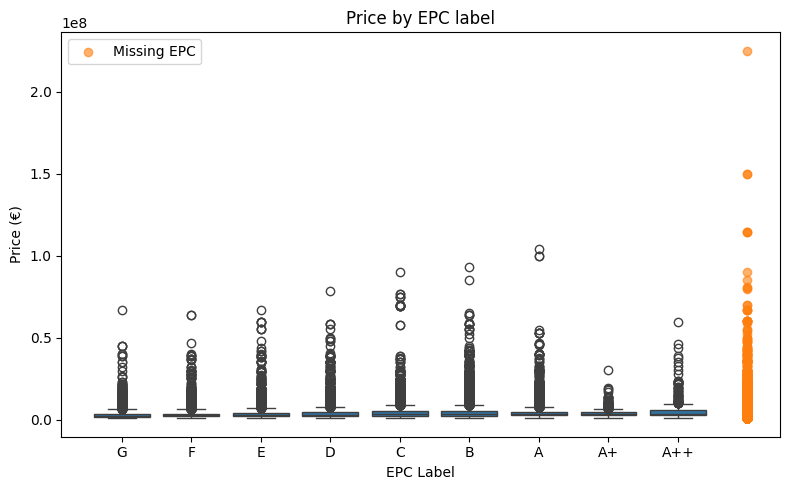

In [28]:
# EPC VS PRICE
df["epc"].value_counts(dropna=False)
df["epc"].apply(type).value_counts()
df["epc_str"] = df["epc"].astype(str)
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x="epc_str",
    y="price",
    order=sorted(df["epc_str"].unique())  # now safe
)
plt.title("Price by EPC label")
plt.show()


# CHANGED ORDER OF LABELS
# Load data
df = pd.read_csv("../Kristin/cleaned_properties.csv")

# Convert EPC to string, keep NaNs as np.nan
df["epc_str"] = df["epc"].astype(str)
df.loc[df["epc"].isna(), "epc_str"] = pd.NA  # ensure NaNs remain

# Define EPC order (best → worst) and reverse for worst → best
epc_order = ["A++", "A+", "A", "B", "C", "D", "E", "F", "G"]
epc_order = list(reversed(epc_order))  # G → A++

plt.figure(figsize=(8,5))

# Boxplot for EPC values (ignores NaN automatically)
sns.boxplot(
    data=df,
    x="epc_str",
    y="price",
    order=epc_order
)

# Overlay missing EPCs as dots
missing = df[df["epc"].isna()]
plt.scatter(
    x=[len(epc_order)]*len(missing),  # place after last box
    y=missing["price"],
    label='Missing EPC',
    alpha=0.6
)

plt.title("Price by EPC label")
plt.xlabel("EPC Label")
plt.ylabel("Price (€)")

plt.legend()
plt.tight_layout()
plt.show()

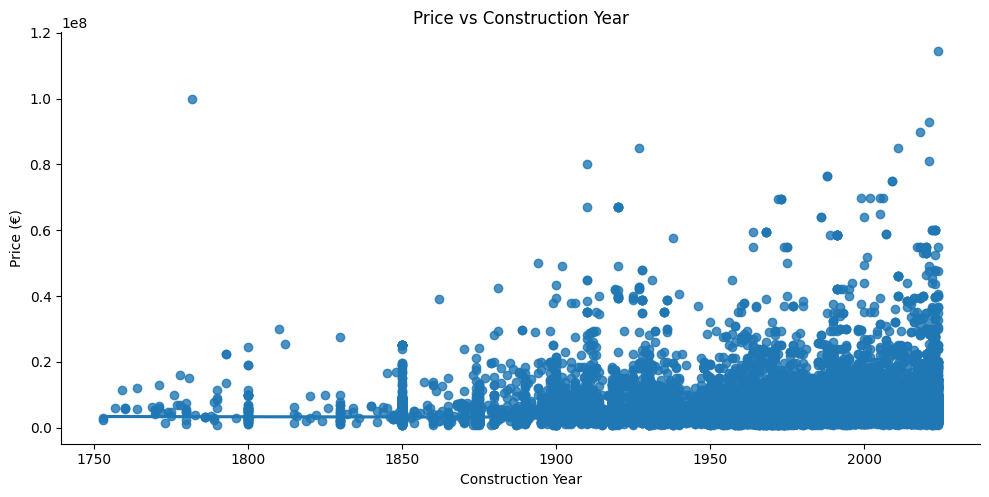

In [29]:
# CONSTRUCTION YEAR VS PRICE
sns.lmplot(
    data=df,
    x="construction_year",
    y="price",
    lowess=True,
    height=5,
    aspect=2
)

plt.title("Price vs Construction Year")
plt.xlabel("Construction Year")
plt.ylabel("Price (€)")
plt.show()

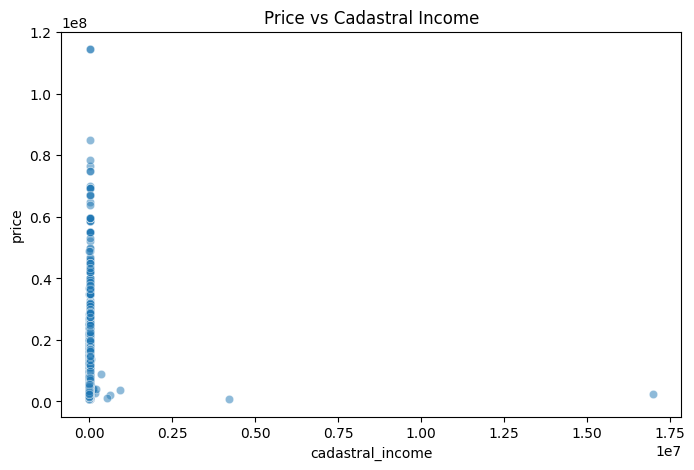

In [30]:
# CADASTRAL INCOME VS PRICE
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="cadastral_income", y="price", alpha=0.5)
plt.title("Price vs Cadastral Income")
plt.show()

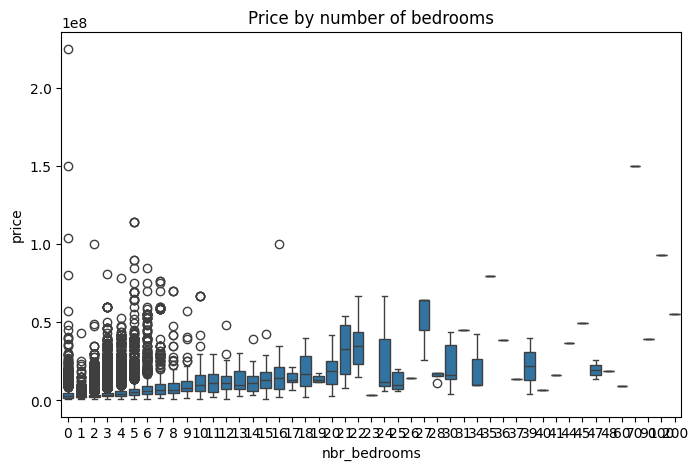

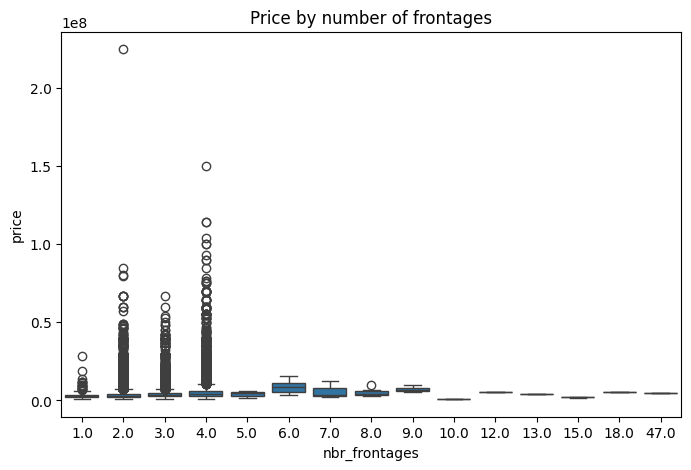

In [31]:
# BEDROOMS / FRONTAGES VS PRICE
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="nbr_bedrooms", y="price")
plt.title("Price by number of bedrooms")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="nbr_frontages", y="price")
plt.title("Price by number of frontages")

plt.show()